# Old Man Winter

Old Man Winter is a winter gravel bike race held in Lyons Colorado. I am excited to ride it in 2022 and was recently asked by a friend what my goal time was. I had no idea what I should even hope for. Since the race is held in February, the conditions could be anything from nice and dry to wet and muddy, to several inches of fresh powder. I figured the average finishing times would vary significantly from year to year depending on the conditions, so I decided to look at the data myself.

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta
from matplotlib.pyplot import figure


pd.set_option('display.max_columns', 500)

import sys
# insert at 1, 0 is the script path (or '' in REPL)
# Inserting the path to the WeatherViewer Module
sys.path.insert(1, '/Users/shelby_salley/Documents/GitHub/weather/')
#sys.path.remove('/Users/shelby_salley/Documents/GitHub/weather/')

from WeatherViewer import check_weather

I downloaded the results over the years from here: https://www.oldmanwinterrally.com/results

Then made a function to clean the data. Column titles were inconsistent or irrelevant, so I renamed several and selected which ones I wanted in my final dataframe. I tried to set the time column to a timedelta type, but found there were oddities in each year's dataset that needed to be corrected such as the words '1/2 Course' and 'DNF' or a race finisher who's time was formatted differently from the rest.

Then I joined all the years together and renamed the Gender column values to be more consistent.

I also calculated finishing times in minutes to make calculating a histogram easier

In [8]:
def clean(df,year):
    final_columns = ['Time', 'Gender', 'Age', 'Pace']
    df.rename(columns = {'M/F':'Gender','time':'Time','gender':'Gender','Sex':'Gender',\
                              'age':'Age','Start to Finish':'Time','Total':'Time'},inplace = True)
    if 'First Name' in df.columns: df['Name'] = df['First Name'] + ' ' + df['Last Name']
    for col in final_columns:
        if col not in df.columns:
            df[col] = np.nan
    df.set_index('Name',inplace= True)
    df = df[final_columns]
    df = df[df['Time'].notna()]
    df = df[df['Time'] != '1/2 Course']
    df = df[df['Time'] != 'DNF']
    df.at['Dan Martin','Time'] = '6:55:00'
    df['Time'] = df['Time'].astype(str).str.split('.').str[0]
    df['Time'] = pd.to_timedelta(df['Time'])
    df['Year'] = year
    return df



df_2015 = pd.read_csv('results_2015.csv',encoding = "ISO-8859-1")
df_2016 = pd.read_csv('results_2016.csv',encoding = "ISO-8859-1")
df_2017 = pd.read_csv('results_2017.csv',encoding = "ISO-8859-1")
df_2018 = pd.read_csv('results_2018.csv',encoding = "ISO-8859-1")
df_2019 = pd.read_csv('results_2019.csv',encoding = "ISO-8859-1")
df_2021 = pd.read_csv('results_2021.csv',encoding = "ISO-8859-1")


df_2015 = clean(df_2015,2015)
df_2016 = clean(df_2016,2016)
df_2017 = clean(df_2017,2017)
df_2018 = clean(df_2018,2018)
df_2019 = clean(df_2019,2019)
df_2021 = clean(df_2021,2021)
df_all = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019,df_2021])
df_all['Time'] = pd.to_timedelta(df_all['Time'])
df_all['Minutes'] = df_all['Time'].apply(lambda x:x.total_seconds()/60)
df_all['Gender'].mask(df_all['Gender'] == 'Male', 'M', inplace=True)
df_all['Gender'].mask(df_all['Gender'] == 'Female', 'F', inplace=True)

Defining M/F filter and year filters

In [9]:
filt_m = df_all['Gender'] == 'M'
filt_f = df_all['Gender'] == 'F'

filt_2015 = df_all['Year']==2015
filt_2016 = df_all['Year']==2016
filt_2017 = df_all['Year']==2017
filt_2018 = df_all['Year']==2018
filt_2019 = df_all['Year']==2019
filt_2021 = df_all['Year']==2021

Defining bins for calculating finishing time histograms

In [10]:
min = df_all['Minutes'].min()
max_min = df_all['Minutes'].max()-df_all['Minutes'].min()
n = 20
size = max_min/n
bins = [min + size*i for i in range(n)]

labels = [timedelta(minutes = bin) for bin in bins]

Defining a function that calculates the hisogram of finishing times for each gender, each year.

In [11]:
def hist_calc(filt_year, filt_gender):
    histogram = np.histogram(df_all[filt_year & filt_gender]['Minutes'], bins=bins)
    hist_y = histogram[0]
    hist_x = []
    for n in range(len(histogram[0])):
        hist_x.append(np.mean([histogram[1][n],histogram[1][n+1]]))
    return (hist_x, hist_y)

# Finishing Time Histograms for Females

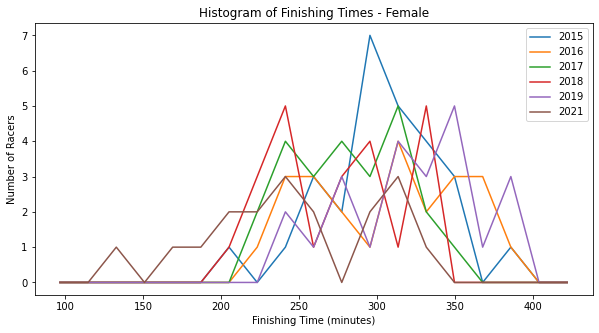

In [13]:
filt_gender = filt_f
hist_2015 = hist_calc(filt_2015, filt_gender)
hist_2016 = hist_calc(filt_2016, filt_gender)
hist_2017 = hist_calc(filt_2017, filt_gender)
hist_2018 = hist_calc(filt_2018, filt_gender)
hist_2019 = hist_calc(filt_2019, filt_gender)
hist_2021 = hist_calc(filt_2021, filt_gender)

plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(hist_2015[0], hist_2015[1], label = 2015)
plt.plot(hist_2016[0], hist_2016[1], label = 2016)
plt.plot(hist_2017[0], hist_2017[1], label = 2017)
plt.plot(hist_2018[0], hist_2018[1], label = 2018)
plt.plot(hist_2019[0], hist_2019[1], label = 2019)
plt.plot(hist_2021[0], hist_2021[1], label = 2021)

plt.legend(labels = ['2015','2016','2017','2018','2019','2021'])
plt.xlabel('Finishing Time (minutes)')
plt.ylabel('Number of Racers')
plt.title('Histogram of Finishing Times - Female');

# Finishing Time Histograms for Males

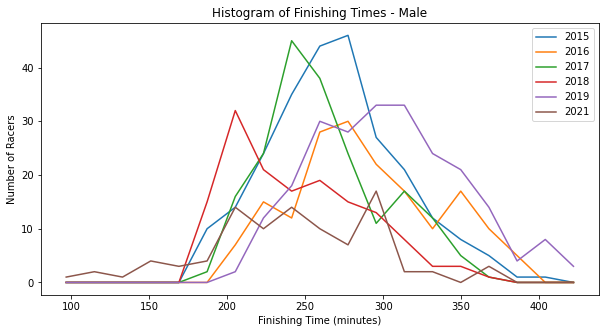

In [15]:
filt_gender = filt_m
hist_2015 = hist_calc(filt_2015, filt_gender)
hist_2016 = hist_calc(filt_2016, filt_gender)
hist_2017 = hist_calc(filt_2017, filt_gender)
hist_2018 = hist_calc(filt_2018, filt_gender)
hist_2019 = hist_calc(filt_2019, filt_gender)
hist_2021 = hist_calc(filt_2021, filt_gender)

plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(hist_2015[0], hist_2015[1], label = 2015)
plt.plot(hist_2016[0], hist_2016[1], label = 2016)
plt.plot(hist_2017[0], hist_2017[1], label = 2017)
plt.plot(hist_2018[0], hist_2018[1], label = 2018)
plt.plot(hist_2019[0], hist_2019[1], label = 2019)
plt.plot(hist_2021[0], hist_2021[1], label = 2021)

plt.legend(labels = ['2015','2016','2017','2018','2019','2021'])
plt.xlabel('Finishing Time (minutes)')
plt.ylabel('Number of Racers')
plt.title('Histogram of Finishing Times - Male');

# Number of Participants per Year

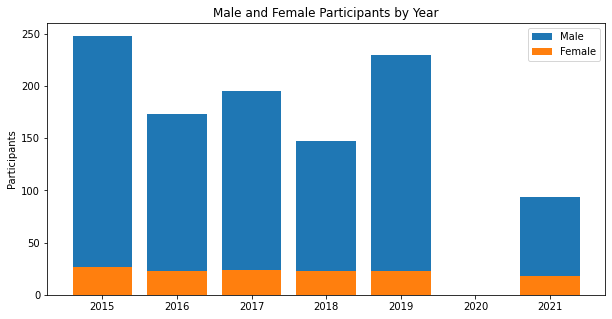

In [16]:
grouped_participants = pd.DataFrame(df_all.groupby(['Year','Gender']).size()).reset_index()
grouped_participants.rename(columns={0:'Count'},inplace = True)
#grouped_participants[filt_m]
male_participants = grouped_participants[grouped_participants['Gender'] == 'M']
female_participants = grouped_participants[grouped_participants['Gender'] == 'F']
plt.bar(height = male_participants['Count'],x = male_participants['Year'])
plt.bar(height = female_participants['Count'],x = female_participants['Year'])
plt.title('Male and Female Participants by Year')
plt.ylabel('Participants')
plt.legend(labels = ['Male', 'Female'])

In [98]:
race_date = {2015:date(2015,2,7),2016:date(2016,2,8),2017:date(2017,2,12),2018:date(2018,2,11),\
             2019:date(2019,2,10),2020:date(2020,2,9),2021:date(2021,2,13)}

In [103]:
days = timedelta(5)
weather_2015 = check_weather('Lyons,CO',(race_date[2015]-days).strftime('%Y-%m-%d'),\
                                         race_date[2015].strftime('%Y-%m-%d'))
weather_2016 = check_weather('Lyons,CO',(race_date[2016]-days).strftime('%Y-%m-%d'),\
                                         race_date[2016].strftime('%Y-%m-%d'))
weather_2017 = check_weather('Lyons,CO',(race_date[2017]-days).strftime('%Y-%m-%d'),\
                                         race_date[2017].strftime('%Y-%m-%d'))
weather_2018 = check_weather('Lyons,CO',(race_date[2018]-days).strftime('%Y-%m-%d'),\
                                         race_date[2018].strftime('%Y-%m-%d'))
weather_2019 = check_weather('Lyons,CO',(race_date[2019]-days).strftime('%Y-%m-%d'),\
                                         race_date[2019].strftime('%Y-%m-%d'))
weather_2020 = check_weather('Lyons,CO',(race_date[2020]-days).strftime('%Y-%m-%d'),\
                                         race_date[2020].strftime('%Y-%m-%d'))
weather_2021 = check_weather('Lyons,CO',(race_date[2021]-days).strftime('%Y-%m-%d'),\
                                         race_date[2021].strftime('%Y-%m-%d'))
weather_df_dict = {2015:weather_2015,2016:weather_2016,2017:weather_2017,2018:weather_2018,\
             2019:weather_2019,2020:weather_2020,2021:weather_2021}

 - Running query URL:  https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Lyons,CO/2015-02-02/2015-02-07?&unitGroup=us&contentType=csv&include=days&key=KHJY9L7H4AJAACFQ9CYDHHGCV
 - Running query URL:  https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Lyons,CO/2016-02-03/2016-02-08?&unitGroup=us&contentType=csv&include=days&key=KHJY9L7H4AJAACFQ9CYDHHGCV
 - Running query URL:  https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Lyons,CO/2017-02-07/2017-02-12?&unitGroup=us&contentType=csv&include=days&key=KHJY9L7H4AJAACFQ9CYDHHGCV
 - Running query URL:  https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Lyons,CO/2018-02-06/2018-02-11?&unitGroup=us&contentType=csv&include=days&key=KHJY9L7H4AJAACFQ9CYDHHGCV
 - Running query URL:  https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Lyons,CO/2019-02-05/2019-02-10?&unitGroup=us&cont

## Generating a race day weather table

In [149]:
def race_day_weather(race_year):
    weather_df = weather_df_dict[race_year]
    race_day_filt = weather_df['datetime'] == race_date[race_year].strftime('%Y-%m-%d')
    return weather_df[race_day_filt]
race_days_df = race_day_weather(2015).append(race_day_weather(2016)).append(race_day_weather(2017)).append(race_day_weather(2018)).append(race_day_weather(2019)).append(race_day_weather(2020)).append(race_day_weather(2021))
race_days_df['year'] = pd.DatetimeIndex(pd.to_datetime(race_days_df['datetime'])).year
race_days_df.set_index('year',inplace = True)
columns_to_keep = ['name','datetime','tempmax','tempmin', 'temp','feelslike', 'precip',
       'precipcover','snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir','conditions', 'description', 'icon', 'stations']
num_cols = ['tempmax','tempmin', 'temp','feelslike', 'precip',
       'precipcover','snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir']
race_days_df = race_days_df.replace('',0)
for col in num_cols:
    race_days_df[col] = race_days_df[col].astype(float)
race_days_df = race_days_df[columns_to_keep]


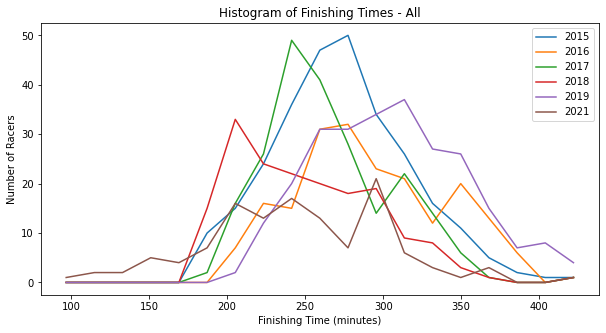

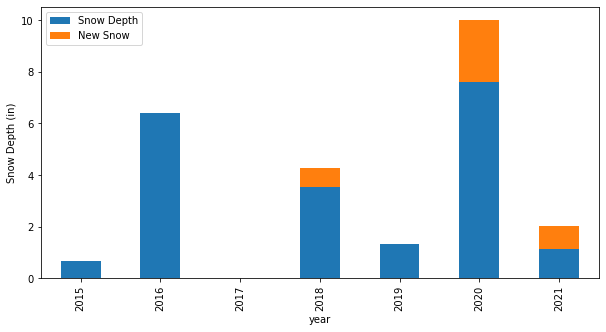

In [150]:
filt_gender = True #Include male and female
hist_2015 = hist_calc(filt_2015, filt_gender)
hist_2016 = hist_calc(filt_2016, filt_gender)
hist_2017 = hist_calc(filt_2017, filt_gender)
hist_2018 = hist_calc(filt_2018, filt_gender)
hist_2019 = hist_calc(filt_2019, filt_gender)
hist_2021 = hist_calc(filt_2021, filt_gender)

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(hist_2015[0], hist_2015[1], label = 2015)
plt.plot(hist_2016[0], hist_2016[1], label = 2016)
plt.plot(hist_2017[0], hist_2017[1], label = 2017)
plt.plot(hist_2018[0], hist_2018[1], label = 2018)
plt.plot(hist_2019[0], hist_2019[1], label = 2019)
plt.plot(hist_2021[0], hist_2021[1], label = 2021)

plt.legend(labels = ['2015','2016','2017','2018','2019','2021'])
plt.xlabel('Finishing Time (minutes)')
plt.ylabel('Number of Racers')
plt.title('Histogram of Finishing Times - All');

plot_df = pd.concat([race_days_df['snowdepth'],race_days_df['snow']],axis = 1)
snow_bar = plot_df.plot.bar(stacked = True)
plt.ylabel('Snow Depth (in)');
plt.legend(labels = ['Snow Depth','New Snow'])

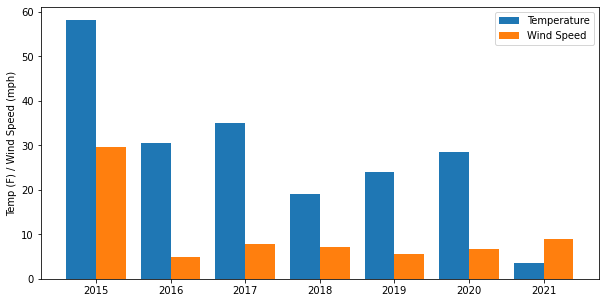

In [172]:
plt.bar(height = race_days_df['temp'], x = race_days_df.index-0.2, width = 0.4)
plt.bar(height = race_days_df['windspeed'], x = race_days_df.index+0.2, width = 0.4)
plt.legend(labels = ['Temperature','Wind Speed'])
plt.ylabel('Temp (F) / Wind Speed (mph)');

In [257]:
median_minutes = df_all.groupby('Year').describe()[('Minutes',   '50%')].rename('Minutes')
columns = ['temp','snow','snowdepth','windspeed']
corr_df = pd.concat([race_days_df[columns],median_minutes],axis = 1)
corr_df['total_snow'] = corr_df['snow'] + corr_df['snowdepth']
corr_df

,temp,snow,snowdepth,windspeed,Minutes,total_snow
2015,58.2,0.00,0.66,29.7,269.750000,0.66
2016,30.6,0.00,6.39,4.9,285.883333,6.39
2017,35.0,0.00,0.00,7.9,257.883333,0.00
2018,19.1,0.74,3.54,7.1,245.850000,4.28
2019,23.9,0.00,1.32,5.5,303.458333,1.32
2020,28.4,2.43,7.59,6.8,NaN,10.02
2021,3.5,0.90,1.14,8.9,245.850000,2.04


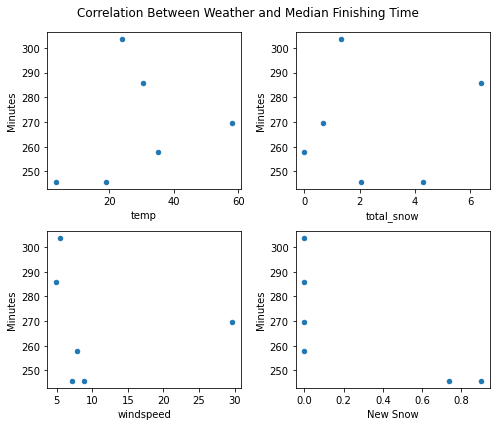

In [264]:
plt.rcParams["figure.figsize"] = (7,6)
fig,axs = plt.subplots(nrows = 2, ncols = 2)
corr_df.plot.scatter(x = 'temp',y = 'Minutes', ax = axs[(0,0)])
corr_df.plot.scatter(x = 'total_snow',y = 'Minutes', ax = axs[(0,1)])
corr_df.plot.scatter(x = 'windspeed',y = 'Minutes', ax = axs[(1,0)])
corr_df.plot.scatter(x = 'snow',y = 'Minutes', ax = axs[(1,1)])
axs[(1,1)].set_xlabel('New Snow')
fig.suptitle('Correlation Between Weather and Median Finishing Time')
plt.tight_layout()

In [275]:
df_all_weather = df_all.merge(race_days_df[columns],left_on = 'Year',right_on = race_days_df.index)
df_all_weather['total_snow'] = df_all_weather['snow'] + df_all_weather['snowdepth']
df_all_weather.head()

,Time,Gender,Age,Pace,Year,Minutes,temp,snow,snowdepth,windspeed,total_snow
0,0 days 03:28:00,F,33.0,NaN,2015,208.000000,58.2,0.0,0.66,29.7,0.66
1,0 days 03:58:21,F,29.0,NaN,2015,238.350000,58.2,0.0,0.66,29.7,0.66
2,0 days 04:11:24,F,46.0,NaN,2015,251.400000,58.2,0.0,0.66,29.7,0.66
3,0 days 04:17:44,F,52.0,NaN,2015,257.733333,58.2,0.0,0.66,29.7,0.66
4,0 days 04:22:27,F,29.0,NaN,2015,262.450000,58.2,0.0,0.66,29.7,0.66


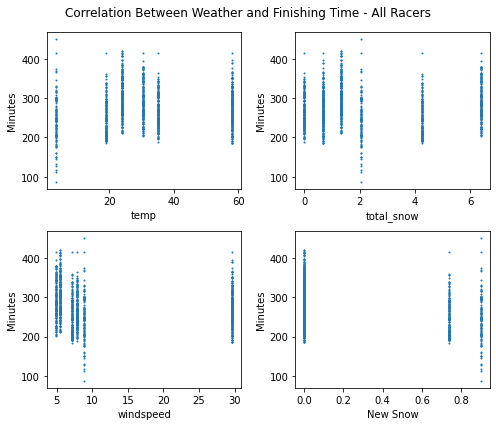

In [285]:
plt.rcParams["figure.figsize"] = (7,6)
fig,axs = plt.subplots(nrows = 2, ncols = 2)
df_all_weather.plot.scatter(x = 'temp',y = 'Minutes', ax = axs[(0,0)],s = 1)
df_all_weather.plot.scatter(x = 'total_snow',y = 'Minutes', ax = axs[(0,1)],s = 1)
df_all_weather.plot.scatter(x = 'windspeed',y = 'Minutes', ax = axs[(1,0)],s = 1)
df_all_weather.plot.scatter(x = 'snow',y = 'Minutes', ax = axs[(1,1)],s = 1)
axs[(1,1)].set_xlabel('New Snow')
fig.suptitle('Correlation Between Weather and Finishing Time - All Racers')
plt.tight_layout()